## Large Scale Final Project
Do Amazon voting behaviors reveal social conformity?
Chun Hu

### Category 5: Video

In [0]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Video/*.parquet')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1591214933999_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 437409
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
data.groupby('marketplace').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|marketplace| count|
+-----------+------+
|         DE|  2927|
|         US|427319|
|         UK|  4582|
|         FR|   530|
|         JP|  2051|
+-----------+------+

FR has significantly fewer reviews -- might lead to large flunctuations in results

In [0]:
data = data.withColumn('helpful_ratio', (data.helpful_votes / data.total_votes).cast("float"))
data = data.filter('helpful_ratio IS NOT NULL')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_rating = data.groupBy('product_id').avg('star_rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_video = data.join(avg_rating, on=['product_id'], how='left_outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_video[['product_id', 'star_rating', 'helpful_ratio', 'avg(star_rating)']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+-----------------+
|product_id|star_rating|helpful_ratio| avg(star_rating)|
+----------+-----------+-------------+-----------------+
|0005119359|          5|          1.0|              5.0|
|0005200288|          5|         0.75|              5.0|
|0005257859|          5|          1.0|              5.0|
|0006486576|          5|          0.5|              5.0|
|0006486576|          5|          1.0|              5.0|
|0307142671|          5|    0.6666667|              5.0|
|0307142752|          5|          1.0|              5.0|
|0307142752|          5|          1.0|              5.0|
|0307554023|          5|        0.875|              5.0|
|0307554023|          5|    0.8888889|              5.0|
|0307554023|          5|    0.8333333|              5.0|
|0394897609|          4|          1.0|4.666666666666667|
|0394897609|          5|          1.0|4.666666666666667|
|0394897609|          5|          1.0|4.666666666666667|
|0590297597|          5|   0.71

In [0]:
data_video = data_video.withColumn('avg_rating', data_video["avg(star_rating)"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive Statistics of products in VIDEO category:

In [0]:
data_video[['avg_rating']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        avg_rating|
+-------+------------------+
|  count|            355462|
|   mean|  4.12835971214925|
| stddev|0.7426412139325975|
|    min|               1.0|
|    25%|              3.75|
|    50%| 4.285714285714286|
|    75%| 4.666666666666667|
|    max|               5.0|
+-------+------------------+

In [0]:
data_video[['helpful_votes']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|    helpful_votes|
+-------+-----------------+
|  count|           355462|
|   mean|5.804406659502281|
| stddev|14.64875508046992|
|    min|                0|
|    25%|                1|
|    50%|                2|
|    75%|                6|
|    max|              894|
+-------+-----------------+

In [0]:
from pyspark.sql.functions import abs

data_video = data_video.withColumn('rating_diff', abs(data_video.avg_rating - data_video.star_rating).cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_video[['product_id', 'helpful_ratio', 'rating_diff']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+-----------+
|product_id|helpful_ratio|rating_diff|
+----------+-------------+-----------+
|0005119359|          1.0|        0.0|
|0005200288|         0.75|        0.0|
|0005257859|          1.0|        0.0|
|0006486576|          0.5|        0.0|
|0006486576|          1.0|        0.0|
|0307142671|    0.6666667|        0.0|
|0307142752|          1.0|        0.0|
|0307142752|          1.0|        0.0|
|0307554023|    0.8888889|        0.0|
|0307554023|    0.8333333|        0.0|
|0307554023|        0.875|        0.0|
|0394897609|          1.0| 0.33333334|
|0394897609|          1.0|  0.6666667|
|0394897609|          1.0| 0.33333334|
|0590297597|   0.71428573|        0.0|
|0634009311|          1.0|        0.0|
|0736037195|          1.0|        0.0|
|0738920916|          1.0|        1.0|
|0738920916|          0.9|        0.0|
|0738920916|   0.95454544|        1.0|
+----------+-------------+-----------+
only showing top 20 rows

In [0]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

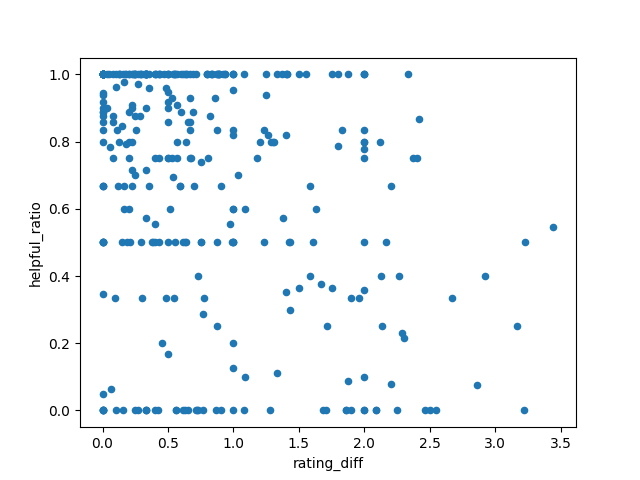

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = data_video.sample(fraction=0.001).toPandas()
sampled_df.plot.scatter('rating_diff', 'helpful_ratio')
%matplot plt

The scatterplot shows that there are a lot more reviews at smaller rating differences and higher helpfulness ratios. There are also more reviews at helpful_ratio equals 0.0, 0.5, and 1.0.

In [0]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        inputCol="helpful_ratio", outputCol="ratio_buckets")
video_buck = bucketizer.setHandleInvalid("keep").transform(data_video)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"0.1", 1.0:"0.2", 2.0:"0.3", 3.0:"0.4", 4.0:"0.5", 5.0:"0.6", 6.0:"0.7", 7.0:"0.8", 8.0:"0.9", 9.0:"1.0"}
udf_foo = udf(lambda x: t[x], StringType())
video_buck =video_buck.withColumn("helpfulness_ratio", udf_foo("ratio_buckets"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_df = (video_buck.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_df.filter(avg_df.helpfulness_ratio != '0.1')
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+
|helpfulness_ratio|   avg(rating_diff)|
+-----------------+-------------------+
|              1.0|0.48541172866478566|
|              0.9| 0.6072261155592058|
|              0.8| 0.7005935274285411|
|              0.7| 0.7673815804564061|
|              0.6| 0.7991926370353135|
|              0.5|  1.250002834228025|
|              0.4| 1.1038754007261247|
|              0.3| 1.3527727508311065|
|              0.2| 1.7710910576207186|
+-----------------+-------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

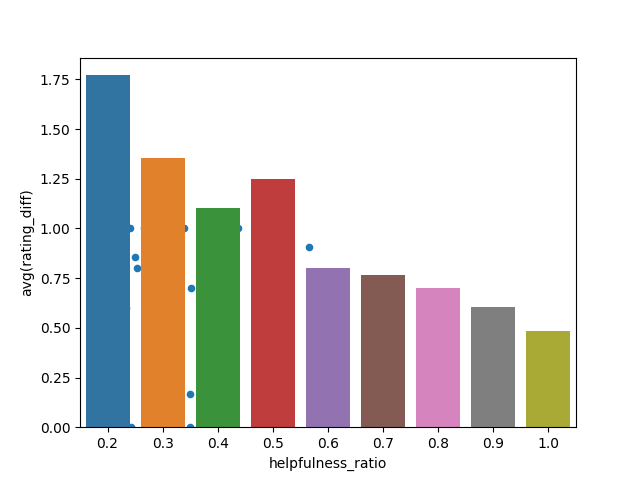

In [0]:
plt.close()

sns.barplot(x='helpfulness_ratio', y='avg(rating_diff)', data=avg_df.toPandas())
%matplot plt

The barplot shows that as helpfulness ratio increases, the difference between review rating and average product rating decreases. This confirms our hypothesis that there is social conformity in voting behaviors.

### By Marketplace
Do different marketplaces (or countries) have different trends?

In [0]:
us_video = video_buck.filter(video_buck.marketplace == 'US')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_us = (us_video.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_us.filter(avg_us.helpfulness_ratio != '0.1')
avg_df = avg_df.withColumn('diff', avg_df["avg(rating_diff)"])
avg_df = avg_df.selectExpr("helpfulness_ratio as helpfulness_ratio", "diff as US")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|                US|
+-----------------+------------------+
|              1.0|0.4870224897008847|
|              0.9|0.6134601247314949|
|              0.8|0.7074108363895941|
|              0.7|0.7767367023992415|
|              0.6|0.8077992013675565|
|              0.5|1.2661027102103317|
|              0.4|1.1139332892754001|
|              0.3|1.3651916532950783|
|              0.2|1.7911207398398226|
+-----------------+------------------+

In [0]:
uk_video = video_buck.filter(video_buck.marketplace == 'UK')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_uk = (uk_video.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_uk = avg_uk.filter(avg_uk.helpfulness_ratio != '0.1')
avg_uk = avg_uk.withColumn('diff', avg_uk["avg(rating_diff)"])
avg_df = avg_df.join(avg_uk, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "diff as UK")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+
|helpfulness_ratio|                US|                UK|
+-----------------+------------------+------------------+
|              1.0|0.4870224897008847|0.3507273836344101|
|              0.9|0.6134601247314949|0.3997881391201339|
|              0.8|0.7074108363895941|0.5201615585357616|
|              0.7|0.7767367023992415| 0.544737934128448|
|              0.6|0.8077992013675565|0.5668729083522301|
|              0.5|1.2661027102103317|0.9017964590433215|
|              0.4|1.1139332892754001|0.9826468263107997|
|              0.3|1.3651916532950783|1.0922373620702364|
|              0.2|1.7911207398398226|1.5231380205933411|
+-----------------+------------------+------------------+

In [0]:
de_video = video_buck.filter(video_buck.marketplace == 'DE')

avg_de = (de_video.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_de = avg_de.filter(avg_de.helpfulness_ratio != '0.1')
avg_de = avg_de.withColumn('diff', avg_de["avg(rating_diff)"])
avg_df = avg_df.join(avg_de, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "diff as DE")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
fr_video = video_buck.filter(video_buck.marketplace == 'FR')

avg_fr = (fr_video.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_fr = avg_fr.filter(avg_fr.helpfulness_ratio != '0.1')
avg_fr = avg_fr.withColumn('diff', avg_fr["avg(rating_diff)"])
avg_df = avg_df.join(avg_fr, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "diff as FR")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
jp_video = video_buck.filter(video_buck.marketplace == 'JP')

avg_jp = (jp_video.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_jp = avg_jp.filter(avg_jp.helpfulness_ratio != '0.1')
avg_jp = avg_jp.withColumn('diff', avg_jp["avg(rating_diff)"])
avg_df = avg_df.join(avg_jp, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "FR", "diff as JP")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

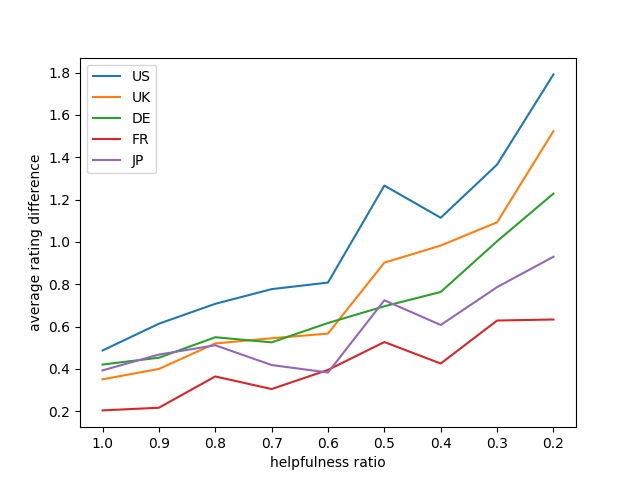

In [0]:
# plot for all countries
plt.close()

US, = plt.plot('helpfulness_ratio', 'US', data=avg_df.toPandas(), label="US")
UK, = plt.plot('helpfulness_ratio', 'UK', data=avg_df.toPandas(), label="UK")
DE, = plt.plot('helpfulness_ratio', 'DE', data=avg_df.toPandas(), label="DE")
FR, = plt.plot('helpfulness_ratio', 'FR', data=avg_df.toPandas(), label="FR")
JP, = plt.plot('helpfulness_ratio', 'JP', data=avg_df.toPandas(), label="JP")
plt.legend(handles=[US, UK, DE, FR, JP])
plt.xlabel('helpfulness ratio')
plt.ylabel('average rating difference')
%matplot plt

The lineplot shows that voting behaviors in all marketplaces reveal trends for social conformity. As expected, FR has the more gentle increase in average rating difference compared to other marketplaces. This is different from their reviews in other product categories. Hence, we will need more data to validate the results for FR.

### Sentiment Analysis
What are some characteristics of reviews that have high or low helpfulness ratio?

In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
     |████████████████████████████████| 215.7MB 54kB/s 
     |████████████████████████████████| 204kB 44.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130388 sha256=3a5a90ea758e5b0cb6e6594fd4ac45b07f75644da3f3e5830c94faf98a35fb29
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark
     |████████████████████████████████| 122kB 7.1MB/s 
Spark NLP version
Apache Spark version


'2.4.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import glob
import pandas as pd

file_path = glob.glob("/content/drive/My Drive/amazon-reviews-dataset/*")
file = file_path[2]

with open(file) as tsvfile:
    col_names = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title",
               "category", "star_rating", "helpful_votes", "total_votes", "vine", "verified_purchase", 
               "review_headline", "review_body", "review_date"]
    data = pd.read_csv(file, sep='\t', names=col_names, skiprows=50000, low_memory=False)

In [9]:
data['helpful_ratio'] = data['helpful_votes'] / data['total_votes']
data = data[data['helpful_ratio'].notnull()]
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_ratio
0,US,23330740,R2R1XBPDVLJY9I,6302413451,450583654,Flamingo Road [VHS],Video,4,3,3,N,N,Good film noir with some great performances,"\\""Flamingo Road\\"" is a 1949 black and white ...",2012-06-15,1.000000
1,US,26519010,R278O1BKPDY8UC,6303450830,237568094,Father Was a Fullback [VHS],Video,4,1,2,N,Y,Father Was A Fullback,How does not like Fred MacMurray movies ! Thes...,2012-06-15,0.500000
10,US,23505836,R3V5UM77YD9IKM,630319172X,585907124,A Century of Women 3: Image & Popular Culture ...,Video,3,1,3,N,N,Informative but?,Interesting and informative..............all l...,2012-06-15,0.333333
13,US,20336051,RBBSH6HG2VGX0,6300216349,284162214,Brother Sun Sister Moon [VHS],Video,5,0,1,N,Y,Brother Sun and Sister Moon,"One of my favorite movies, the story of St. Fr...",2012-06-15,0.000000
19,US,13460679,R3PDRGAZVEP2F,6302869269,187205952,Dark Shadows Vol 182 [VHS],Video,5,1,1,N,N,This volume contains very exciting episodes!,As an avid and loyal fan of the original Dark ...,2012-06-15,1.000000


In [10]:
most_helpful = data[data['helpful_ratio'] == 1.0]
most_helpful.shape

(100515, 16)

In [11]:
least_helpful = data[data['helpful_ratio'] <= 0.2]
least_helpful.shape

(41483, 16)

In [0]:
from sklearn.utils import shuffle
most_helpful = shuffle(most_helpful)[:10000]
least_helpful = shuffle(least_helpful)[:10000]

In [13]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('analyze_sentiment', lang='en')
most_helpful['sentiment'] = most_helpful['review_body'].apply(pipeline.annotate)

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [0]:
most_helpful['bin'] = most_helpful.sentiment.apply(lambda x: x['sentiment'][0])
most_helpful['sentiment_value'] = most_helpful.bin.astype("category").cat.codes - 1

In [15]:
most_helpful['sentiment_value'].mean()

0.4958

In [0]:
least_helpful['sentiment'] = least_helpful['review_body'].apply(pipeline.annotate)

In [0]:
least_helpful['bin'] = least_helpful.sentiment.apply(lambda x: x['sentiment'][0])
least_helpful['sentiment_value'] = least_helpful.bin.astype("category").cat.codes - 1

In [18]:
least_helpful['sentiment_value'].mean()

0.4625

Helpful reviews and unhelpful reviews have similar sentiment values.

### TF-IDF
What are the top terms in helpful and unhelpful reviews?

In [0]:
most_helpful = data[data['helpful_ratio'] == 1.0]
least_helpful = data[data['helpful_ratio'] < 0.2]
most_helpful = shuffle(most_helpful)[:10000][['review_body']]
least_helpful = shuffle(least_helpful)[:10000][['review_body']]

In [0]:
from pyspark.sql import SparkSession
# start spark session configured for spark nlp
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark_helpful = spark.createDataFrame(most_helpful)
spark_unhelpful = spark.createDataFrame(least_helpful)

In [0]:
from pyspark.ml.feature import *
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="review_body", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
countVect = CountVectorizer(inputCol="filtered", outputCol="cv",  minDF=5.0)
idf = IDF(inputCol="cv", outputCol="idf")
pipeline = Pipeline(stages=[tokenizer, remover, countVect, idf])

Helpful Reviews

In [0]:
helpful = pipeline.fit(spark_helpful).transform(spark_helpful)

In [0]:
helpful_df = helpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in helpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in helpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [28]:
for i in indices[:10]:
    print(words[i])

featured
good
shape.
me.
marry.
become
brushes.
perfect

/>


Unhelpful Reviews

In [0]:
unhelpful = pipeline.fit(spark_unhelpful).transform(spark_unhelpful)

In [0]:
unhelpful_df = unhelpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in unhelpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in unhelpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [33]:
for i in indices[:15]:
    print(words[i])

buy
left
cranking
best
never
complete
total
spend
definate
trust
going
ford
/>


